یک شبکه عصبی با استفاده از روش Center Loss طراحی کرده و روی مجموعه داده CIFAR-10 آموزش دهید. پس از آموزش، از UMAP برای کاهش ابعاد داده‌ها به فضای دو‌بعدی استفاده کنید. داده‌های کاهش‌یافته را در ابزار TensorFlow Projector برای بصری‌سازی نمایش دهید. برای جلوگیری از شلوغی در نمایش، از هر کلاس تنها 5 نمونه انتخاب کنید و بصری‌سازی را انجام دهید.

In [1]:
from keras.datasets import cifar10
from keras.layers import Input,Conv2D,Activation,Dense,Lambda,Flatten,Embedding,PReLU,BatchNormalization,Dropout
from keras.models import Model
from keras.utils import to_categorical
import numpy as np
from keras.callbacks import EarlyStopping
import io
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
inputs=Input((32,32,3))
x=Conv2D(32,(3,3))(inputs)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(32,(3,3))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(64,(5,5))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(64,(5,5))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(128,(7,7))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(128,(7,7))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Conv2D(256,(7,7))(x)
x=BatchNormalization()(x)
x=PReLU()(x)
x=Flatten()(x)
x = Dropout(0.5)(x)
x=Dense(512)(x)
out1=PReLU(name="out1")(x)
out2=Dense(10,activation="softmax")(out1)

model=Model(inputs,out2)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu (PReLU)                      │ (None, 30, 30, 32)          │          28,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_1 (PReLU)                    │ (None, 28, 28, 32)          │          25,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_2 (PReLU)                    │ (None, 24, 24, 64)          │          36,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 20, 20, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_3 (PReLU)                    │ (None, 20, 20, 64)          │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_4 (PReLU)                    │ (None, 14, 14, 128)         │          25,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,658,154 (13.95 MB)

 Trainable params: 3,656,746 (13.95 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [4]:
lambda_c = 1
input_ = Input(shape=(1,))

# Embedding layer
centers = Embedding(10, 512)(input_)

# Center Loss
intra_loss = Lambda(
    lambda x: tf.reduce_sum(tf.square(x[0] - tf.squeeze(x[1], axis=1)), axis=1, keepdims=True)
)([out1, centers])


# Model definition
model_center_loss = Model([inputs, input_], [out2, intra_loss])


# Compile the model
opt_adam = keras.optimizers.Adam(learning_rate=0.001,decay=1e-6)

model_center_loss.compile(
    optimizer=opt_adam,
    loss=["categorical_crossentropy", lambda y_true, y_pred: y_pred],
    loss_weights=[1, lambda_c / 2.],
    metrics=["accuracy", None]
)

# Model summary
model_center_loss.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 30, 30, 32)     │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 30, 30, 32)     │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ p_re_lu (PReLU)           │ (None, 30, 30, 32)     │         28,800 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 28, 28, 32)     │          9,248 │ p_re_lu[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 28, 28, 32)     │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ p_re_lu_1 (PReLU)         │ (None, 28, 28, 32)     │         25,088 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 24, 24, 64)     │         51,264 │ p_re_lu_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 24, 24, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ p_re_lu_2 (PReLU)         │ (None, 24, 24, 64)     │         36,864 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 20, 20, 64)     │        102,464 │ p_re_lu_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 20, 20, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ p_re_lu_3 (PReLU)         │ (None, 20, 20, 64)     │         25,600 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 14, 14, 128)    │        401,536 │ p_re_lu_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 14, 14, 128)    │            512 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ p_re_lu_4 (PReLU)         │ (None, 14, 14, 128)    │         25,088 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 8, 8, 128)      │        802,944 │ p_re_lu_4[0][0]        │
├──────────────────────

 Total params: 3,663,274 (13.97 MB)

 Trainable params: 3,661,866 (13.97 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [5]:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)
print(y_train_one_hot.shape)

(50000, 32, 32, 3)
(50000, 1)
(50000, 10)


In [6]:
dummy_matrix1=np.zeros((x_train.shape[0],1))
dummy_matrix2=np.zeros((x_test.shape[0],1))

model_center_loss.fit(x=[x_train,y_train],y=[y_train_one_hot,dummy_matrix1],
                     batch_size=512,epochs=100,verbose=1,validation_data=([x_test,y_test],[y_test_one_hot,dummy_matrix2]),
                     callbacks=[EarlyStopping(monitor="val_loss",patience=30)])

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 60s 329ms/step - dense_1_accuracy: 0.1054 - dense_1_loss: 2.3280 - lambda_loss: 12.1216 - loss: 14.4498 - val_dense_1_accuracy: 0.1000 - val_dense_1_loss: 2.3029 - val_lambda_loss: 0.0024 - val_loss: 2.3053
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 142ms/step - dense_1_accuracy: 0.1151 - dense_1_loss: 2.3002 - lambda_loss: 0.0071 - loss: 2.3072 - val_dense_1_accuracy: 0.1000 - val_dense_1_loss: 2.3030 - val_lambda_loss: 4.4855e-04 - val_loss: 2.3036
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - dense_1_accuracy: 0.1210 - dense_1_loss: 2.2984 - lambda_loss: 0.0024 - loss: 2.3007 - val_dense_1_accuracy: 0.1008 - val_dense_1_loss: 2.3028 - val_lambda_loss: 8.2103e-04 - val_loss: 2.3037
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - dense_1_accuracy: 0.1233 - dense_1_loss: 2.2959 - lambda_loss: 0.0026 - loss: 2.2985 - val_dense_1_accuracy: 0.1065 - val_dense_1_loss: 2.3003 - val_lambda_loss: 8.4730e-04 - val_loss: 2.3013
Epoch 5/10

In [7]:
# Create a model that outputs the desired layer's output
layer_name = 'out1'  # Replace with the correct layer name
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Get the intermediate features
test_features = intermediate_layer_model.predict(x_test)
print(test_features.shape)

# Compute test centers
test_centers = np.dot(np.transpose(y_test_one_hot), test_features)
test_centers_count = np.sum(np.transpose(y_test_one_hot), axis=1, keepdims=True)
test_centers /= test_centers_count
print(test_centers.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
(10000, 512)
(10, 512)


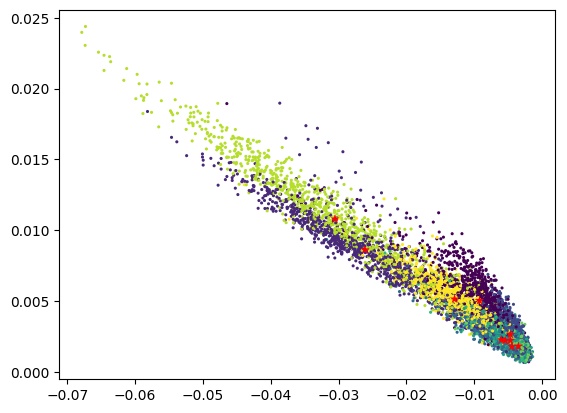

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(test_features[:,0],test_features[:,1],c=y_test,edgecolor="none",s=5)
plt.scatter(test_centers[:,0],test_centers[:,1],c="red",marker="*",edgecolor="none",s=50)
plt.show()

In [9]:
pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.2 MB/s eta 0:00:00


In [10]:
import umap
# استفاده از UMAP برای کاهش ابعاد به فضای دو‌بعدی
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
features_2d = reducer.fit_transform(test_features)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [11]:
# Select 5 samples from each class
selected_samples = []
selected_labels = []
for class_idx in range(10):
    indices = np.where(y_test.flatten() == class_idx)[0][:5]  # Select 5 samples from each class
    selected_samples.extend(features_2d[indices])
    selected_labels.extend(y_test[indices])

selected_samples = np.array(selected_samples)
selected_labels = np.array(selected_labels)

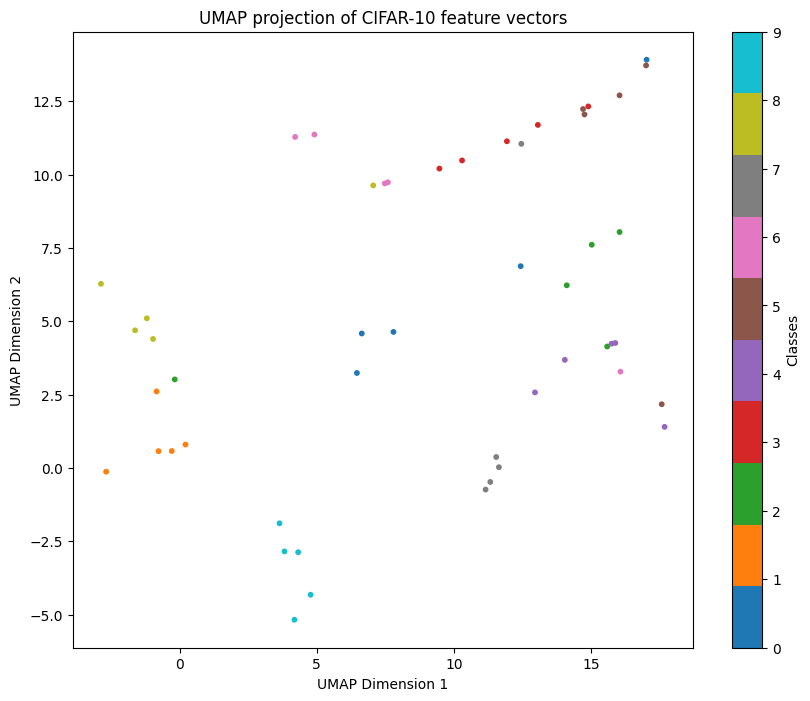

In [12]:
# رسم داده‌های کاهش‌یافته در فضای دو‌بعدی
plt.figure(figsize=(10, 8))
scatter = plt.scatter(selected_samples[:, 0], selected_samples[:, 1], c=selected_labels.flatten(), cmap='tab10', s=10)
plt.colorbar(scatter, label="Classes")
plt.title("UMAP projection of CIFAR-10 feature vectors")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.savefig("umap_projection.png")
plt.show()

In [13]:
# Ensure embeddings (test_features) are 2-dimensional
if test_features.shape[1] == 1:
    raise ValueError("Embedding dimensions must be at least 2 for TensorFlow Embedding Projector.")

# Save embeddings to "vecs.tsv"
np.savetxt("vecs.tsv", selected_samples, delimiter='\t')

# Save class names (metadata) corresponding to embeddings
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

with io.open('meta.tsv', 'w', encoding='utf-8') as out_m:
    for label in selected_labels.flatten():  # Flatten y_test to iterate over class indices
        out_m.write(class_names[label] + "\n")

# Optionally download the files if running in Google Colab
try:
    from google.colab import files
    files.download('vecs.tsv')
    files.download('meta.tsv')
except Exception as e:
    print(f"Download skipped: {e}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>